In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
file_path = r'silk-survey.xlsx'

In [9]:
df = pd.read_excel(file_path)

In [10]:
df.head(5)

,age,gender,profession,location,wornSilk,frequency,types,occasions,purchaseSource,budget,purchasePreference,qualityOpinion,priceVsQuality,productIssue,knowGI,seenVideo,promoUseful,buyOnline
0,18–25,Male,Student,Rajshahi,No,Never,Never Used,Never Used,Never bought,1000–3000 BDT,Quality,Average,No,Yes,Yes,Yes,Extremely helpful,Yes
1,18–25,Male,Student,Rajshahi,No,Never,Never Used,Never Used,Rajshahi Silk Emporium,1000–3000 BDT,Price,Good,Yes,No,No,Yes,Helpful,No
2,18–25,Male,Student,Rajshahi,No,Never,Never Used,Never Used,Never bought,Above 5000 BDT,Other,Don't know,Not sure,No,No,Yes,Helpful,Yes
3,18–25,Female,Student,Rajshahi,Yes,Rarely,Kameez,Casual use,Boutique or brand shop,1000–3000 BDT,Quality,Good,Not sure,No,Yes,No,Neutral,No
4,18–25,Female,Student,Rajshahi,No,Never,Never Used,Never Used,Never bought,Less than 1000 BDT,Price,Average,No,No,No,Yes,Neutral,No


In [36]:
df.shape

(132, 18)

# 1. Is there an age-based difference in Rajshahi Silk usage?

In [11]:
ct_age_use = pd.crosstab(df['age'], df['wornSilk'])

In [12]:
ct_age_use

wornSilk,No,Yes
age,,
18–25,54,60
26–35,5,9
36–50,1,1
Above 50,1,1


In [13]:
ct_age_use_prop = pd.crosstab(df['age'], df['wornSilk'], normalize='index').round(3) * 100

In [14]:
ct_age_use_prop

wornSilk,No,Yes
age,,
18–25,47.4,52.6
26–35,35.7,64.3
36–50,50.0,50.0
Above 50,50.0,50.0


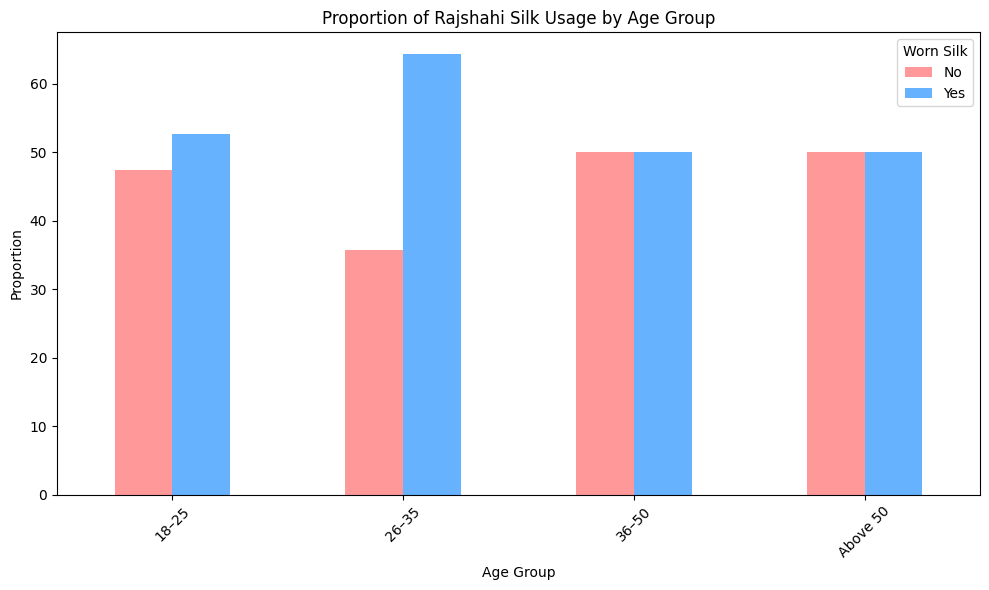

In [15]:
# Plot a bar chart for the proportions
ct_age_use_prop.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#FF9999', '#66B2FF'])
plt.title('Proportion of Rajshahi Silk Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Worn Silk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Proportion of Rajshahi Silk Usage by Gender

In [16]:
# Create a crosstab for gender vs. wornSilk with proportions
ct_gender_use_prop = pd.crosstab(df['gender'], df['wornSilk'], normalize='index').round(3) * 100

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['gender'], df['wornSilk']))

# Display the crosstab (proportions)
print("Proportion of Rajshahi Silk Usage by Gender (%):")
print(ct_gender_use_prop)

# Display chi-square test results
print(f"Chi² statistic = {chi2:.3f}")
print(f"P-value: {p:.4f}")

Proportion of Rajshahi Silk Usage by Gender (%):
wornSilk    No   Yes
gender              
Female    23.9  76.1
Male      72.1  27.9
Chi² statistic = 28.743
P-value: 0.0000


# 3. Proportion of Rajshahi Silk Usage by Profession

In [17]:
# Create a crosstab for profession vs. wornSilk with proportions
ct_profession_use_prop = pd.crosstab(df['profession'], df['wornSilk'], normalize='index').round(3) * 100

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['profession'], df['wornSilk']))

# Display the crosstab (proportions)
print("Proportion of Rajshahi Silk Usage by Profession (%):")
print(ct_profession_use_prop)

# Display chi-square test results
print(f"Chi² statistic = {chi2:.3f}")
print(f"P-value: {p:.4f}")

Proportion of Rajshahi Silk Usage by Profession (%):
wornSilk           No   Yes
profession                 
Businessperson  100.0   0.0
Housewife        25.0  75.0
Other            25.0  75.0
Service Holder   75.0  25.0
Student          45.8  54.2
Chi² statistic = 5.119
P-value: 0.2753


# 4. Proportion of Purchase Source by Age and Gender Group

In [18]:
# Crosstab with proportions (%)
ct_age_purchase_prop = pd.crosstab(df['age'], df['purchaseSource'], normalize='index').round(3) * 100
ct_gender_purchase_prop = pd.crosstab(df['gender'], df['purchaseSource'], normalize='index').round(3) * 100

# Crosstab with counts (for chi-square test)
ct_age_counts = pd.crosstab(df['age'], df['purchaseSource'])
ct_gender_counts = pd.crosstab(df['gender'], df['purchaseSource'])

# Perform chi-square tests
chi2_age, p_age, dof_age, expected_age = chi2_contingency(ct_age_counts)
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(ct_gender_counts)

# Display Age vs. Purchase Source
print("Proportion of Purchase Source by Age Group (%):")
print(ct_age_purchase_prop)

print("\nChi-Square Test Results for Age vs. Purchase Source:")
print(f"Chi² statistic = {chi2_age:.3f}")
print(f"Degrees of freedom = {dof_age}")
print(f"P-value = {p_age:.4f}")

# Display Gender vs. Purchase Source
print("\nProportion of Purchase Source by Gender (%):")
print(ct_gender_purchase_prop)

print("\nChi-Square Test Results for Gender vs. Purchase Source:")
print(f"Chi² statistic = {chi2_gender:.3f}")
print(f"Degrees of freedom = {dof_gender}")
print(f"P-value = {p_gender:.4f}")


Proportion of Purchase Source by Age Group (%):
purchaseSource  Boutique or brand shop  Local market  Never bought  \
age                                                                  
18–25                              7.9          10.5          31.6   
26–35                              7.1          21.4          21.4   
36–50                              0.0           0.0          50.0   
Above 50                          50.0          50.0           0.0   

purchaseSource  Online store  Rajshahi Silk Emporium  
age                                                   
18–25                    7.9                    42.1  
26–35                   28.6                    21.4  
36–50                    0.0                    50.0  
Above 50                 0.0                     0.0  

Chi-Square Test Results for Age vs. Purchase Source:
Chi² statistic = 17.544
Degrees of freedom = 12
P-value = 0.1303

Proportion of Purchase Source by Gender (%):
purchaseSource  Boutique or brand sh

#5. calculate the frequency of each occasion among respondents who have worn silk

In [19]:
# Filter for respondents who have worn silk
df_silk_users = df[df['wornSilk'] == 'Yes']

# Create a crosstab for occasions with counts
ct_occasions = pd.crosstab(index=df_silk_users['occasions'], columns='count')

# Calculate proportions
ct_occasions['proportion'] = (ct_occasions['count'] / ct_occasions['count'].sum()).round(3) * 100

# Display the results
print("Frequency and Proportion of Rajshahi Silk Usage by Occasion (%):")
print(ct_occasions)

Frequency and Proportion of Rajshahi Silk Usage by Occasion (%):
col_0          count  proportion
occasions                       
Casual use         8        11.3
Daily              1         1.4
Festival          22        31.0
Other              9        12.7
Party              1         1.4
Special event     25        35.2
Wedding            5         7.0


# 6. most popular type of Rajshahi silk

In [20]:
# Count the frequency of each silk type
type_counts = df['types'].value_counts()

# Calculate proportions
total = len(df)
type_proportions = (type_counts / total * 100).round(3)

# Combine counts and proportions
result = pd.DataFrame({'Count': type_counts, 'Proportion (%)': type_proportions})

print("Frequency and Proportion of Rajshahi Silk Types (%):")
print(result)

Frequency and Proportion of Rajshahi Silk Types (%):
             Count  Proportion (%)
types                             
Never Used      47          35.606
Saree           46          34.848
Panjabi         18          13.636
Three-piece      7           5.303
Kameez           5           3.788
Shirt            4           3.030
Scarf            3           2.273
Other            2           1.515


# 7. Where do they usually prefer to buy silk from?

In [21]:
# Filter out respondents who never bought silk
df_buyers = df[df['purchaseSource'] != 'Never bought']

# Create a crosstab for purchaseSource with counts and proportions
ct_purchase_source = pd.crosstab(index=df_buyers['purchaseSource'], columns='count')
ct_purchase_source['proportion'] = (ct_purchase_source['count'] / ct_purchase_source['count'].sum()).round(3) * 100

# Display the results
print("Frequency and Proportion of Purchase Source for Rajshahi Silk (%):")
print(ct_purchase_source)

Frequency and Proportion of Purchase Source for Rajshahi Silk (%):
col_0                   count  proportion
purchaseSource                           
Boutique or brand shop     11        12.0
Local market               16        17.4
Online store               13        14.1
Rajshahi Silk Emporium     52        56.5


# 8. What do they prioritize the most—quality, price, design, brand, or tradition?

In [22]:

# Create a crosstab for purchasePreference with counts and proportions
ct_preference = pd.crosstab(index=df['purchasePreference'], columns='count')
ct_preference['proportion'] = (ct_preference['count'] / ct_preference['count'].sum()).round(3) * 100

# Display the results
print("Frequency and Proportion of Purchase Preference for Rajshahi Silk (%):")
print(ct_preference)

Frequency and Proportion of Purchase Preference for Rajshahi Silk (%):
col_0               count  proportion
purchasePreference                   
Color                   5         3.8
Durability              3         2.3
Other                   5         3.8
Price                  16        12.1
Quality               103        78.0


#9. To what extent do consumers perceive the quality of Rajshahi silk to be consistent with its price?

In [23]:
# Create a crosstab for priceVsQuality with counts and proportions
ct_price_vs_quality = pd.crosstab(index=df['priceVsQuality'], columns='count')
ct_price_vs_quality['proportion'] = (ct_price_vs_quality['count'] / ct_price_vs_quality['count'].sum()).round(3) * 100

# Display the results
print("Frequency and Proportion of Consumer Perception of Rajshahi Silk Price vs. Quality (%):")
print(ct_price_vs_quality)

Frequency and Proportion of Consumer Perception of Rajshahi Silk Price vs. Quality (%):
col_0           count  proportion
priceVsQuality                   
No                 33        25.0
Not sure           50        37.9
Yes                49        37.1


# 10. Which factor plays the biggest role in consumer satisfaction—design, price, tradition, or brand?

In [24]:
# Create a crosstab for purchasePreference with counts and proportions
ct_preference = pd.crosstab(index=df['purchasePreference'], columns='count')
ct_preference['proportion'] = (ct_preference['count'] / ct_preference['count'].sum()).round(3) * 100

# Display the results
print("Frequency and Proportion of Factors Influencing Consumer Satisfaction (%):")
print(ct_preference)

Frequency and Proportion of Factors Influencing Consumer Satisfaction (%):
col_0               count  proportion
purchasePreference                   
Color                   5         3.8
Durability              3         2.3
Other                   5         3.8
Price                  16        12.1
Quality               103        78.0


#11. What is the rate of awareness regarding the GI (Geographical Indication) tag of Rajshahi silk?

In [25]:
# Calculate awareness rate for GI tag
gi_awareness_count = df['knowGI'].value_counts()
gi_awareness_prop = (df['knowGI'].value_counts(normalize=True) * 100).round(3)

result = pd.DataFrame({'Count': gi_awareness_count, 'Proportion (%)': gi_awareness_prop})

print("Frequency and Proportion of Awareness of Rajshahi Silk GI Tag (%):")
print(result)

Frequency and Proportion of Awareness of Rajshahi Silk GI Tag (%):
        Count  Proportion (%)
knowGI                       
Yes        84          63.636
No         48          36.364


# 12. Does awareness of the GI (Geographical Indication) tag influence silk purchasing behavior?

In [26]:
# Create a crosstab for knowGI vs. wornSilk with proportions
ct_gi_purchase = pd.crosstab(df['knowGI'], df['wornSilk'], normalize='index').round(3) * 100

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['knowGI'], df['wornSilk']))

# Display the crosstab (proportions)
print("Proportion of Silk Purchase Behavior by GI Tag Awareness (%):")
print(ct_gi_purchase)

# Display chi-square test results
print(f"Chi² statistic = {chi2:.3f}")
print(f"P-value: {p:.4f}")

Proportion of Silk Purchase Behavior by GI Tag Awareness (%):
wornSilk    No   Yes
knowGI              
No        58.3  41.7
Yes       39.3  60.7
Chi² statistic = 3.725
P-value: 0.0536


#13. Does the habit of watching videos about Rajshahi silk on Facebook or YouTube influence the interest in online purchasing?

In [27]:
# Create a crosstab for seenVideo vs. buyOnline with proportions
ct_video_buy = pd.crosstab(df['seenVideo'], df['buyOnline'], normalize='index').round(3) * 100

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['seenVideo'], df['buyOnline']))

# Display the crosstab (proportions)
print("Proportion of Online Buying Interest by Video Watching Habit (%):")
print(ct_video_buy)

# Display chi-square test results
print(f"Chi² statistic = {chi2:.3f}")
print(f"P-value: {p:.4f}")

Proportion of Online Buying Interest by Video Watching Habit (%):
buyOnline    No   Yes
seenVideo            
No         60.0  40.0
Yes        39.1  60.9
Chi² statistic = 4.092
P-value: 0.0431


# 14. How helpful is digital media (e.g., Facebook/YouTube) in promoting Rajshahi silk?

In [28]:
# Create a crosstab for promoUseful with counts and proportions
ct_promo_useful = pd.crosstab(index=df['promoUseful'], columns='count')
ct_promo_useful['proportion'] = (ct_promo_useful['count'] / ct_promo_useful['count'].sum()).round(3) * 100

# Display the results
print("Frequency and Proportion of Perceived Helpfulness of Digital Media for Rajshahi Silk Promotion (%):")
print(ct_promo_useful)

Frequency and Proportion of Perceived Helpfulness of Digital Media for Rajshahi Silk Promotion (%):
col_0               count  proportion
promoUseful                          
Extremely helpful      24        18.2
Helpful                63        47.7
Neutral                32        24.2
Not helpful             6         4.5
Not helpful at all      7         5.3


# 15. Is there any difference in interest in online purchasing based on age?


In [29]:
# Create a crosstab for age vs. buyOnline with proportions
ct_age_buyonline = pd.crosstab(df['age'], df['buyOnline'], normalize='index').round(3) * 100

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['age'], df['buyOnline']))

# Display the crosstab (proportions)
print("Proportion of Online Buying Interest by Age Group (%):")
print(ct_age_buyonline)

# Display chi-square test results
print(f"Chi² statistic = {chi2:.3f}")
print(f"P-value: {p:.4f}")

Proportion of Online Buying Interest by Age Group (%):
buyOnline     No   Yes
age                   
18–25       47.4  52.6
26–35       21.4  78.6
36–50      100.0   0.0
Above 50    50.0  50.0
Chi² statistic = 5.845
P-value: 0.1194


# 16. Which age or profession group shows the most interest in purchasing Rajshahi silk online?

In [30]:
# Create a crosstab for age vs. buyOnline with proportions
ct_age_buyonline = pd.crosstab(df['age'], df['buyOnline'], normalize='index').round(3) * 100

# Create a crosstab suntfor profession vs. buyOnline with proportions
ct_profession_buyonline = pd.crosstab(df['profession'], df['buyOnline'], normalize='index').round(3) * 100

# Display the results
print("Proportion of Online Buying Interest by Age Group (%):")
print(ct_age_buyonline)
print("\nProportion of Online Buying Interest by Profession (%):")
print(ct_profession_buyonline)

Proportion of Online Buying Interest by Age Group (%):
buyOnline     No   Yes
age                   
18–25       47.4  52.6
26–35       21.4  78.6
36–50      100.0   0.0
Above 50    50.0  50.0

Proportion of Online Buying Interest by Profession (%):
buyOnline         No   Yes
profession                
Businessperson  50.0  50.0
Housewife       50.0  50.0
Other           25.0  75.0
Service Holder  50.0  50.0
Student         45.8  54.2


# 17 . Have you ever faced any issue with durability or color?

In [31]:
import pandas as pd

# Create a crosstab for productIssue with counts and proportions
ct_issues = pd.crosstab(index=df['productIssue'], columns='count')
ct_issues['proportion'] = (ct_issues['count'] / ct_issues['count'].sum()).round(3) * 100

# Display the results
print("Frequency and Proportion of Problems with Rajshahi Silk (%):")
print(ct_issues)

Frequency and Proportion of Problems with Rajshahi Silk (%):
col_0         count  proportion
productIssue                   
No              114        86.4
Yes              18        13.6


# 18. What is the main reason for those who do not use Rajshahi silk?

In [32]:
# Filter for respondents who do not use Rajshahi silk
df_non_users = df[df['wornSilk'] == 'No']

# Analyze possible reasons via crosstabs (budget, quality opinion, price vs quality, product issue)
ct_budget_non = pd.crosstab(df_non_users['budget'], columns='count')
ct_budget_non['proportion (%)'] = (ct_budget_non['count'] / len(df_non_users) * 100).round(3)

ct_quality_non = pd.crosstab(df_non_users['qualityOpinion'], columns='count')
ct_quality_non['proportion (%)'] = (ct_quality_non['count'] / len(df_non_users) * 100).round(3)

ct_price_non = pd.crosstab(df_non_users['priceVsQuality'], columns='count')
ct_price_non['proportion (%)'] = (ct_price_non['count'] / len(df_non_users) * 100).round(3)

ct_issue_non = pd.crosstab(df_non_users['productIssue'], columns='count')
ct_issue_non['proportion (%)'] = (ct_issue_non['count'] / len(df_non_users) * 100).round(3)

# Display results
print("Number of non-users:", len(df_non_users))
print("\nBudget among non-users (%):")
print(ct_budget_non)
print("\nQuality Opinion among non-users (%):")
print(ct_quality_non)
print("\nPrice vs Quality among non-users (%):")
print(ct_price_non)
print("\nProduct Issue among non-users (%):")
print(ct_issue_non)

Number of non-users: 61

Budget among non-users (%):
col_0               count  proportion (%)
budget                                   
1000–3000 BDT          26          42.623
3000–5000 BDT           9          14.754
Above 5000 BDT          6           9.836
Less than 1000 BDT     20          32.787

Quality Opinion among non-users (%):
col_0           count  proportion (%)
qualityOpinion                       
Average            10          16.393
Don't know         21          34.426
Excellent          17          27.869
Good               11          18.033
Poor                2           3.279

Price vs Quality among non-users (%):
col_0           count  proportion (%)
priceVsQuality                       
No                 15          24.590
Not sure           34          55.738
Yes                12          19.672

Product Issue among non-users (%):
col_0         count  proportion (%)
productIssue                       
No               51          83.607
Yes              1

#19. Do previous negative experiences (e.g., high price, color fading) influence the tendency for long-term silk usage?

In [33]:
# Filter for respondents who have used silk
df_users = df[df['wornSilk'] == 'Yes']

# Crosstabs with proportions (%)
ct_issue_freq = pd.crosstab(df_users['productIssue'], df_users['frequency'], normalize='index').round(3) * 100
ct_price_quality_freq = pd.crosstab(df_users['priceVsQuality'], df_users['frequency'], normalize='index').round(3) * 100

# Crosstabs with counts (for chi-square test)
ct_issue_counts = pd.crosstab(df_users['productIssue'], df_users['frequency'])
ct_price_quality_counts = pd.crosstab(df_users['priceVsQuality'], df_users['frequency'])

# Perform chi-square tests
chi2_issue, p_issue, dof_issue, expected_issue = chi2_contingency(ct_issue_counts)
chi2_price_quality, p_price_quality, dof_price_quality, expected_price_quality = chi2_contingency(ct_price_quality_counts)

# Display results
print("Proportion of Long-Term Silk Usage by Product Issue (%):")
print(ct_issue_freq)

print("\nChi-Square Test for Product Issue vs. Frequency:")
print(f"Chi² statistic = {chi2_issue:.3f}")
print(f"Degrees of freedom = {dof_issue}")
print(f"P-value = {p_issue:.4f}")

print("\nProportion of Long-Term Silk Usage by Price vs. Quality Perception (%):")
print(ct_price_quality_freq)

print("\nChi-Square Test for Price vs. Quality vs. Frequency:")
print(f"Chi² statistic = {chi2_price_quality:.3f}")
print(f"Degrees of freedom = {dof_price_quality}")
print(f"P-value = {p_price_quality:.4f}")


Proportion of Long-Term Silk Usage by Product Issue (%):
frequency     Rarely  Regularly  Sometimes
productIssue                              
No              46.0        1.6       52.4
Yes             12.5       25.0       62.5

Chi-Square Test for Product Issue vs. Frequency:
Chi² statistic = 11.234
Degrees of freedom = 2
P-value = 0.0036

Proportion of Long-Term Silk Usage by Price vs. Quality Perception (%):
frequency       Rarely  Regularly  Sometimes
priceVsQuality                              
No                61.1        5.6       33.3
Not sure          31.2        6.2       62.5
Yes               37.8        2.7       59.5

Chi-Square Test for Price vs. Quality vs. Frequency:
Chi² statistic = 4.433
Degrees of freedom = 4
P-value = 0.3505


#20. Which customer group (by age/profession) has the highest potential for online purchase of Rajshahi silk?

In [34]:
# Create crosstab for age vs buyOnline with proportions
ct_age_buy = pd.crosstab(df['age'], df['buyOnline'], normalize='index').round(3) * 100

# Create crosstab for profession vs buyOnline with proportions
ct_profession_buy = pd.crosstab(df['profession'], df['buyOnline'], normalize='index').round(3) * 100

# Display results
print("Proportion of Online Purchase Interest by Age Group (%):")
print(ct_age_buy)
print("\nProportion of Online Purchase Interest by Profession (%):")
print(ct_profession_buy)

Proportion of Online Purchase Interest by Age Group (%):
buyOnline     No   Yes
age                   
18–25       47.4  52.6
26–35       21.4  78.6
36–50      100.0   0.0
Above 50    50.0  50.0

Proportion of Online Purchase Interest by Profession (%):
buyOnline         No   Yes
profession                
Businessperson  50.0  50.0
Housewife       50.0  50.0
Other           25.0  75.0
Service Holder  50.0  50.0
Student         45.8  54.2


# 21. Which type of digital strategy (platform and content) would be most effective in making traditional products popular among the youth?

In [35]:
# Filter for youth (18–25 and 26–35 age groups)
df_youth = df[df['age'].isin(['18–25', '26–35'])]

# Crosstabs for digital engagement among youth
ct_seen_video = pd.crosstab(df_youth['age'], df_youth['seenVideo'], normalize='index').round(3) * 100
ct_promo_useful = pd.crosstab(df_youth['age'], df_youth['promoUseful'], normalize='index').round(3) * 100
ct_buy_online = pd.crosstab(df_youth['age'], df_youth['buyOnline'], normalize='index').round(3) * 100

# Crosstab for GI awareness vs. buyOnline to infer content impact
ct_gi_buy = pd.crosstab(df_youth['knowGI'], df_youth['buyOnline'], normalize='index').round(3) * 100

# Chi-square tests to check associations
chi2_video, p_video, _, _ = chi2_contingency(pd.crosstab(df_youth['seenVideo'], df_youth['buyOnline']))
chi2_promo, p_promo, _, _ = chi2_contingency(pd.crosstab(df_youth['promoUseful'], df_youth['buyOnline']))
chi2_gi, p_gi, _, _ = chi2_contingency(pd.crosstab(df_youth['knowGI'], df_youth['buyOnline']))

# Display results
print("Proportion of Youth Watching Videos on Platforms like Facebook/YouTube (%):")
print(ct_seen_video)
print("\nProportion of Perceived Helpfulness of Digital Promotions Among Youth (%):")
print(ct_promo_useful)
print("\nProportion of Online Buying Interest Among Youth (%):")
print(ct_buy_online)
print("\nProportion of Online Buying Interest by GI Awareness Among Youth (%):")
print(ct_gi_buy)
print("\nChi-Square Test P-values (Association with Online Buying Interest):")
print(f"Seen Video: {p_video:.4f}")
print(f"Promo Usefulness: {p_promo:.4f}")
print(f"GI Awareness: {p_gi:.4f}")

Proportion of Youth Watching Videos on Platforms like Facebook/YouTube (%):
seenVideo    No   Yes
age                  
18–25      32.5  67.5
26–35      14.3  85.7

Proportion of Perceived Helpfulness of Digital Promotions Among Youth (%):
promoUseful  Extremely helpful  Helpful  Neutral  Not helpful  \
age                                                             
18–25                     18.4     50.0     23.7          3.5   
26–35                     21.4     42.9     28.6          7.1   

promoUseful  Not helpful at all  
age                              
18–25                       4.4  
26–35                       0.0  

Proportion of Online Buying Interest Among Youth (%):
buyOnline    No   Yes
age                  
18–25      47.4  52.6
26–35      21.4  78.6

Proportion of Online Buying Interest by GI Awareness Among Youth (%):
buyOnline    No   Yes
knowGI               
No         40.4  59.6
Yes        46.9  53.1

Chi-Square Test P-values (Association with Online Buying Int